<a href="https://colab.research.google.com/github/oroyansarah22/CHAPTER-10/blob/main/Concrete_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

features_names= ['Cement','BFS','FLA','Water','SP','CA','FA','Age','CCS']
concrete_data = pd.read_excel('Concrete_Data.xls',
                              names=features_names)

summary = concrete_data.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136    35.817836  
std      77.753818    80.175427    63.169912    16.705679  
min     801.000000   594.000000     1.000000     2.331808  
25%     932.000000   730.950000  

<Axes: >

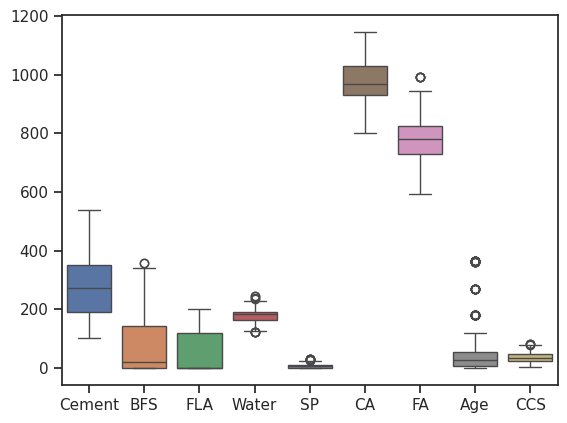

In [ ]:
sns.set(style="ticks")
sns.boxplot(data = concrete_data)

In [ ]:
scaler = MinMaxScaler()
print(scaler.fit(concrete_data))
scaled_data = scaler.fit_transform(concrete_data)
scaled_data = pd.DataFrame(scaled_data, columns=features_names)

summary = scaled_data.describe()
print(summary)

MinMaxScaler()
            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean      0.409054     0.205608     0.270800     0.477576     0.192643   
std       0.238601     0.240064     0.319822     0.170504     0.185512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.206336     0.000000     0.000000     0.344511     0.000000   
50%       0.390183     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397746     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean      0.499763     0.450524     0.122698     0.417181  
std       0.226029     0.201143     0.173544     0.208125  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.380814

<Axes: >

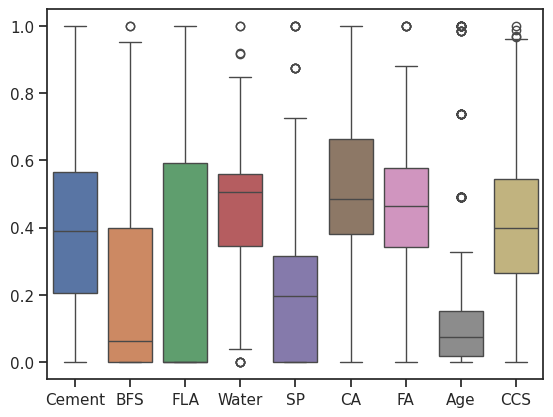

In [ ]:
sns.boxplot(data = scaled_data)

In [ ]:
input_data = pd.DataFrame(scaled_data.iloc[:,:8])
output_data = pd.DataFrame(scaled_data.iloc[:,8])

inp_train, inp_test, out_train, out_test = train_test_split(input_data,output_data, test_size = 0.30, random_state = 1)
print(inp_train.shape)
print(inp_test.shape)
print(out_train.shape)
print(out_test.shape)

(721, 8)
(309, 8)
(721, 1)
(309, 1)


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(inp_train, out_train, epochs=1000, verbose=1)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 5.1934e-04 - loss: 0.1982
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.7477e-04 - loss: 0.0756 
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.7477e-04 - loss: 0.0511 
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0036 - loss: 0.0393     
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0036 - loss: 0.0346     
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0036 - loss: 0.0276
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 3.0187e-04 - loss: 0.0226
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 6.0072e-04 - loss: 0.0210
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0015 - loss: 0.0201
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0022 - loss: 0.0191
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0017 - loss: 0.0194
Epoch 12/1000
23/23 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,535 (6.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024 (4.00 KB)

In [ ]:
output_pred = model.predict(inp_test)

print('Coefficient of determination = ')
print(r2_score(out_test, output_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Coefficient of determination = 
0.8688912987709045
